# Define simulation with new A-field

In [3]:
using Damysos
using CairoMakie

Precompiling Damysos
  ✓ Damysos
  1 dependency successfully precompiled in 21 seconds. 449 already precompiled.


In [166]:
path = pwd()
freq = u"0.2THz"
vf  = u"4.3e5m/s"
σ = u"8000fs"
us = scaledriving_frequency(freq,vf)
h = GappedDirac(energyscaled(u"0.20meV",us))
l = TwoBandDephasingLiouvillian(h,Inf,timescaled(1.0/freq,us))
df = GaussianAPulse(us,σ,freq,u"0.00001MV/cm",0.0,π/2)
pars = NumericalParamsSingleMode(0.,0.,1e-3,-5df.σ,1e-8,1e-12)
sim = Simulation(l,df,pars,[Velocity(pars),Occupation(pars)],us,path,path,"singlecycle")

Simulation{Float64} (0d):
 TwoBandDephasingLiouvillian(GappedDirac)
   Hamiltonian: GappedDirac
   m: 1.519267447878626
   vF: 1.0
  t1: Inf
  t2: 1.0
 GaussianAPulse:
  σ: 1.6
  ν: 1.0
  ω: 6.283185307179586
  eE: 16.33212506469523
  φ: 0.0
  ħω: 6.283185307179586
  θ: 1.5707963267948966
 NumericalParamsSingleMode:
  kx: 0.0
  ky: 0.0
  kxmax: 0.0
  kymax: 0.0
  kxsamples: [0.0]
  kysamples: [0.0]
  dt: 0.001
  t0: -8.0
  rtol: 1.0e-8
  atol: 1.0e-12
  tsamples: -8.0:0.001:8.0
  tspan: (-8.0, 8.0)
  nt: 16001
 Observables:
  Velocity
  Occupation
 UnitScaling:
  timescale: 5000.0 fs
  lengthscale: 2150.0 nm
 id: "/misc/rz_cloud/richter/how09898/.julia/dev/dev_damysos/jupyter/single-cycle"
 datapath: "/misc/rz_cloud/richter/how09898/.julia/dev/dev_damysos/jupyter/single-cycle"
 plotpath: "singlecycle"


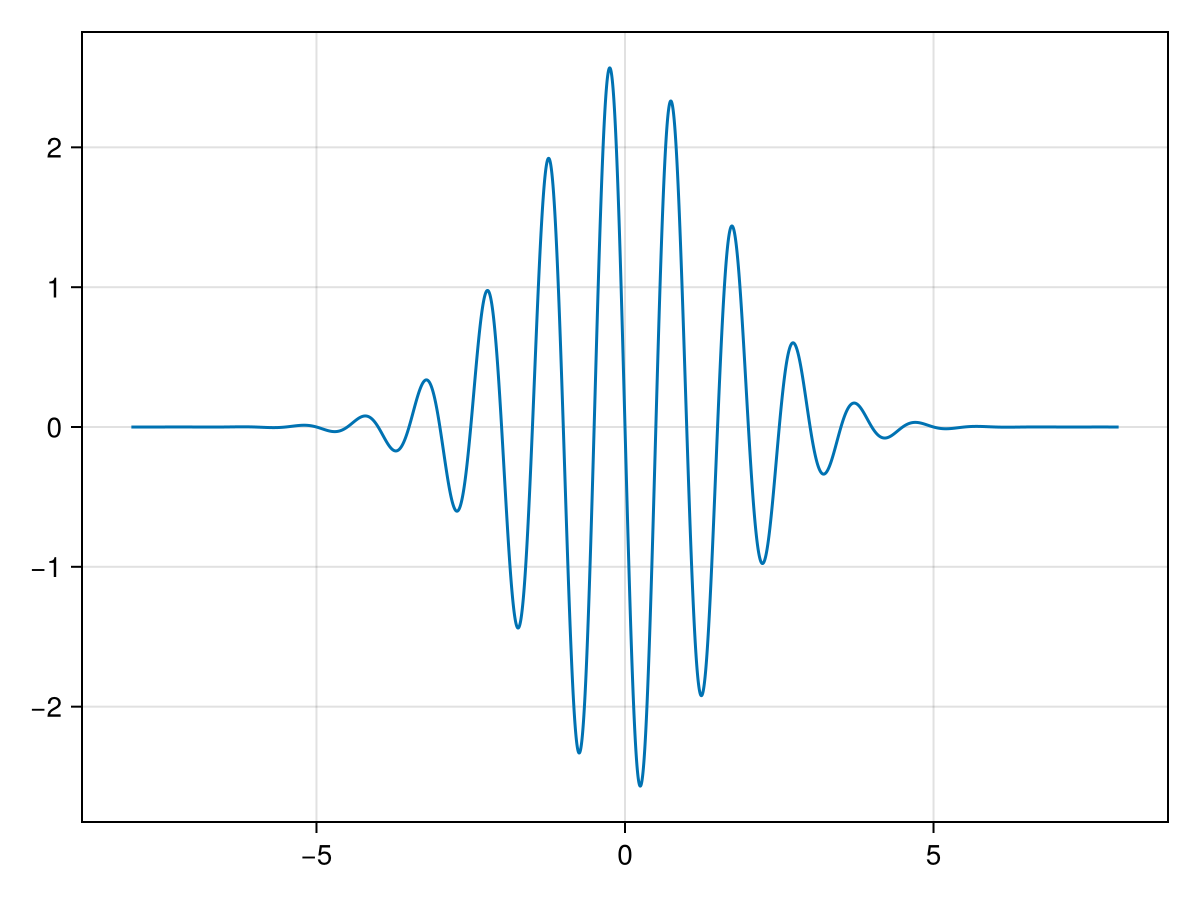

In [167]:
ts = gettsamples(sim)
ax = get_vecpotx(sim)
lines(ts,ax.(ts))

## Check that phase-shift was implemented correctly

In [113]:
@eval ax2(t) = $(vecpotx(df))

ax2 (generic function with 1 method)

In [114]:
ax.(ts) - ax2.(ts) |> maximum

2.842170943040401e-14

In [115]:
fx = get_efieldx(df)
@eval fx2(t) = $(efieldx(df))

fx2 (generic function with 1 method)

In [116]:
fx.(ts) - fx2.(ts) |> maximum

2.2737367544323206e-13

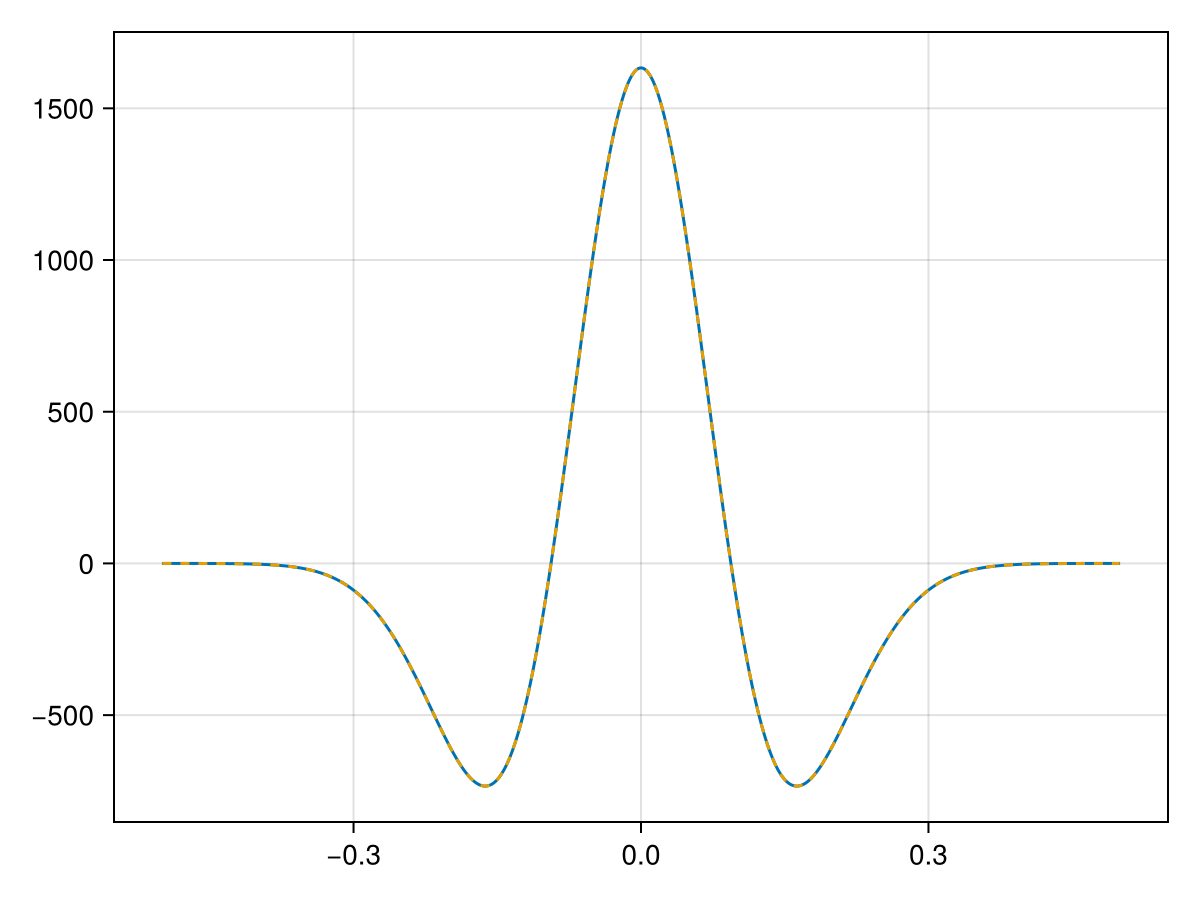

In [117]:
data = ax.(ts)
ax_fd = diff(data)/sim.numericalparams.dt
dts = ts[1:end-1] .+ sim.numericalparams.dt/2
fig,axis,_ = lines(ts,fx.(ts))
lines!(axis,dts,-1.0 .* ax_fd,linestyle=:dash)
fig

# Solve eoms

In [169]:
solver = SingleMode()
fns = define_functions(sim,solver)
run!(sim,fns,solver,savedata=false,saveplots=false)
v=sim.observables[1]
occ=sim.observables[2]

┌ Info: ## Simulation{Float64}(0d)TwoBandDephasingLiouvillian(GappedDirac)_GaussianAPulse (id: /misc/rz_cloud/richter/how09898/.julia/dev/dev_damysos/jupyter/single-cycle)
│ 
│ Starting on **pc1012251314** at **2024-05-28T10:43:31.461**:
│ 
│ * threads: 12
│ * processes: 1
│ * plotpath: singlecycle
│ * datapath: /misc/rz_cloud/richter/how09898/.julia/dev/dev_damysos/jupyter/single-cycle
│ 
│ | Parameter | Value (SI units) | Value (scaled) |
│ |-----------|------------------|----------------|
│ | ζ | 0.829 |   |
│ | γ | 0.584 |   |
│ | M | 0.484 |   |
│ | plz | 0.641 |   |
│ | m | 0.2 meV  | 1.519267447878626 |
│ | vF | 430000.0 m s^-1  | 1.0 |
│ | t2 | 5000.0 fs  | 1.0 |
│ | σ | 8000.0 fs  | 1.6 |
│ | ω | 0.00126 fs^-1  | 6.28 |
│ | ν | 0.2 THz  | 1.0 |
│ | eE | 1.0e-5 MV cm^-1  | 16.3 |
│ | φ | 0.0  | 0.0 |
│ | ħω | 0.000827 eV  | 6.28 |
│ | kx | 0.0 Å^-1  | 0.0 |
│ | ky | 0.0 Å^-1  | 0.0 |
│ | t0 | -40000.0 fs  |   |
│ | dt | 5.0 fs  | 0.001 |
│ | nt | 16000.0  | 16000.0 |
│ | rtol |

Occupation{Float64}([0.0, 4.036065920673675e-16, 1.6239113638459294e-15, 3.675213964198918e-15, 6.57186272615194e-15, 1.03282059827394e-14, 1.4958592066988384e-14, 2.047736931192287e-14, 2.6898902830684852e-14, 3.4238350866460315e-14  …  0.4857347054118362, 0.4857347054119843, 0.48573470541213165, 0.4857347054122784, 0.4857347054124244, 0.48573470541256963, 0.48573470541271424, 0.4857347054128582, 0.4857347054130013, 0.48573470541314373])

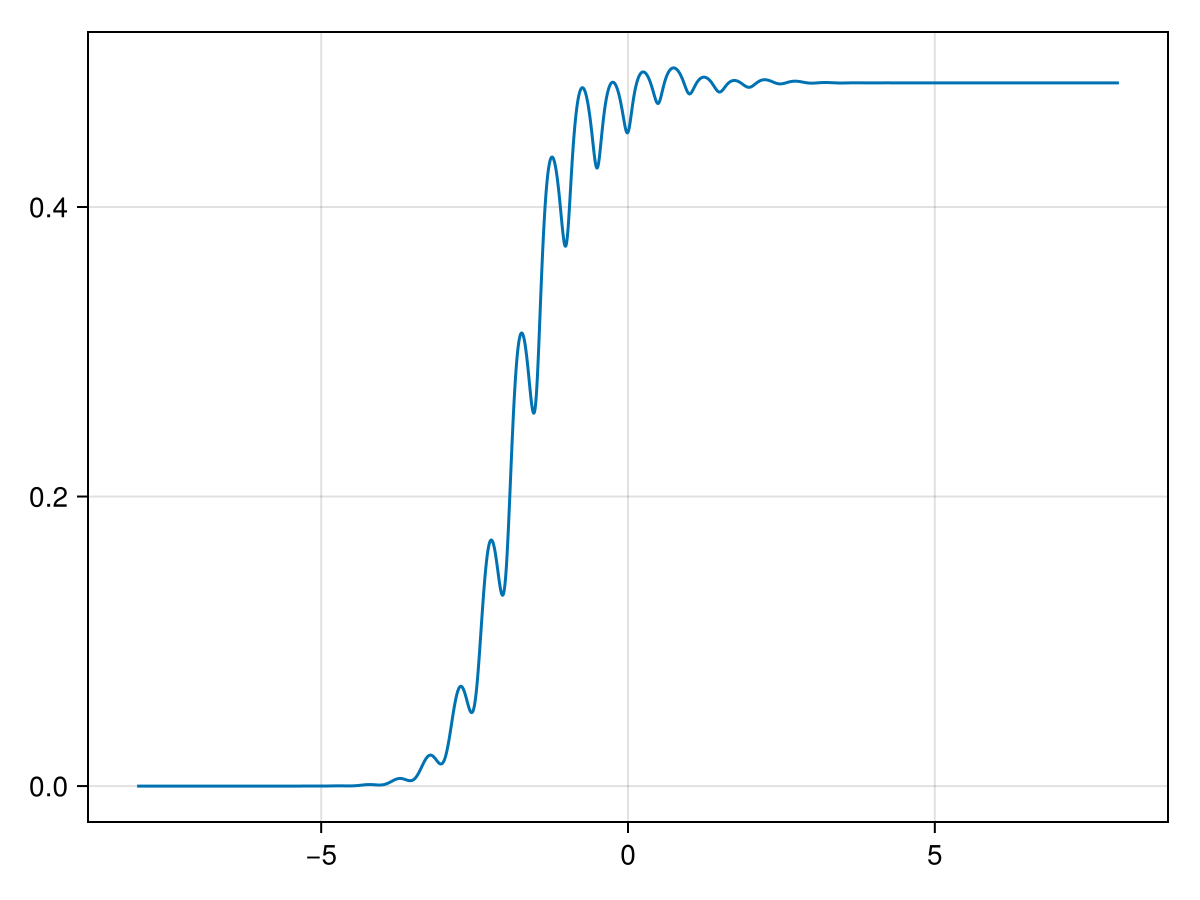

In [170]:
lines(ts,occ.cbocc)

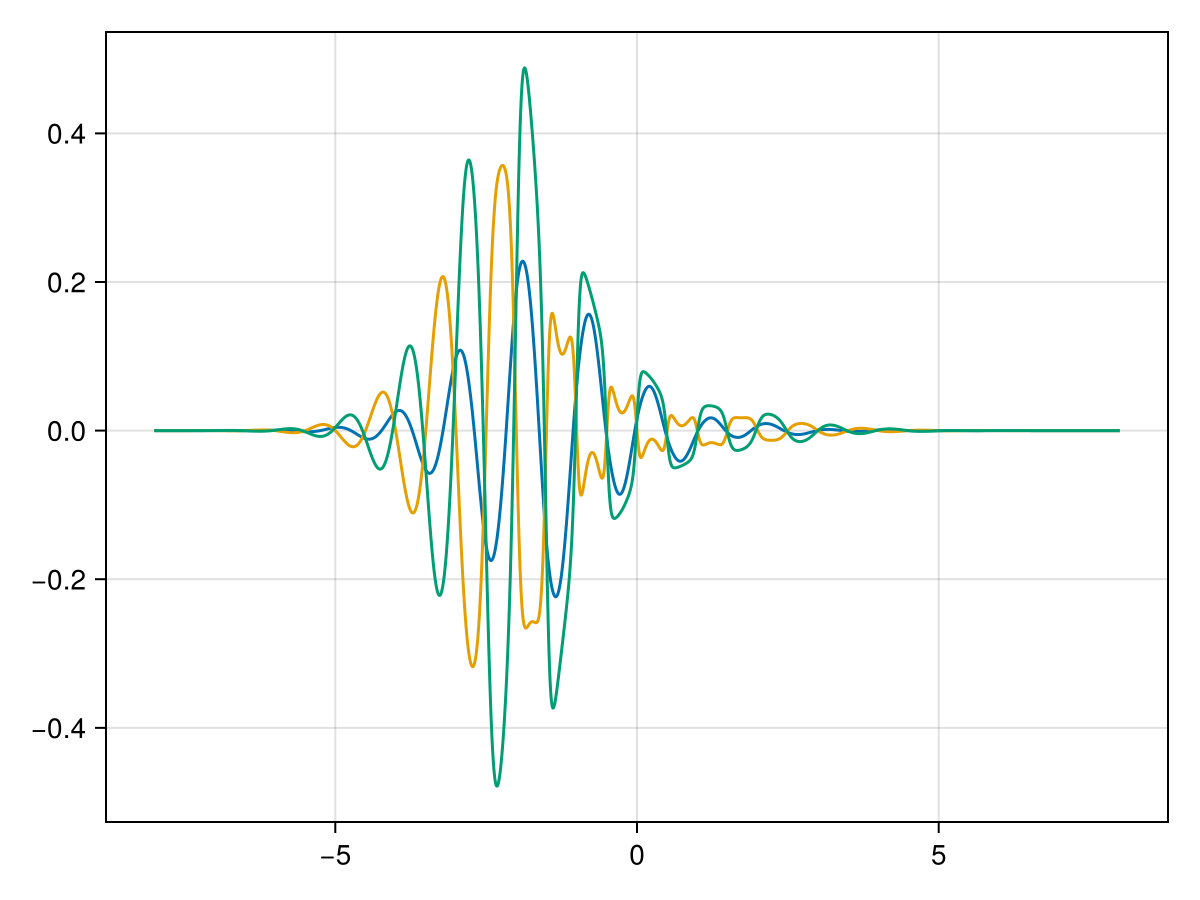

In [171]:
fig,axis,_ = lines(ts,v.vx)
lines!(axis,ts,v.vxintra)
lines!(axis,ts,v.vxinter)
fig

In [122]:
import Damysos.plotdata

In [172]:
plotdata(sim;maxharm=60)

[ Info: Generating plots
[ Info: Plotting Velocity
[ Info: Plotting Occupation
[ Info: Plotting driving field
